# Investments Assignment SparkFunds LLP

In [2]:
#load the Data 

import numpy as np
import pandas as pd

companies_df=pd.read_csv('companies.txt',sep= "\t",encoding='palmos')
companies_df.head()
#select distinct Unique ID  count from Companies dataframe using 'permalink'
companies_df['permalink'].nunique()

#Convert the permalink field to upper for merging
companies_df['permalink'] = companies_df['permalink'].str.upper()
companies_df.shape
companies_df.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2_df =pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2_df.head()
#select distinct Unique ID  count from Companies dataframe using 'company_permalink'
rounds2_df['company_permalink'].nunique()
#Convert the company_permalink field to upper for merging

rounds2_df['company_permalink']= rounds2_df['company_permalink'].str.upper()
rounds2_df.shape
rounds2_df.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#merge companies dataframe to rounds2 dataframe
master_frame = pd.merge(rounds2_df,companies_df,left_on='company_permalink',right_on='permalink',how='left')
master_frame.shape
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### Investment Type Analysis to find of which funding_round_type to Invest in

In [5]:
# Specifying the format options for floats
pd.options.display.float_format = '{:.2f}'.format

#Filter out  only the interested funding types and Calculating the mean from which we are 
#interested in Angel,seed,venture,private_equity
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]
master_frame.groupby('funding_round_type').raised_amount_usd.mean()

funding_round_type
angel              958694.47
private_equity   73308593.03
seed               719818.00
venture          11748949.13
Name: raised_amount_usd, dtype: float64

In [6]:
#Finding the count of records with missing values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         63277
funded_at                      0
raised_amount_usd          13770
permalink                     27
name                          28
homepage_url                4169
category_list               2517
status                        27
country_code                7326
state_code                  9283
region                      8564
city                        8561
founded_at                 16738
dtype: int64

### Country Analysis to find out which countries to invest in


In [7]:
# Filter out and select only items with funding_round_type as 'venture' and we are only interested in Venture
master_frame.head()
master_frame_venture=master_frame[master_frame.funding_round_type=='venture']
master_frame_venture.head()

#Groupby country_code and calculate the sum and sort and select the top9
#top9=master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
#top9.head(9)

top9= master_frame_venture.groupby('country_code')['raised_amount_usd'].agg(sum_raised_amt_usd='sum').sort_values(by='sum_raised_amt_usd',ascending=False)
#Country3_df=pd.merge(Country3_df,Country3_df_cnt,how='left',on='main_sector')
top9.head(10)


#From above we know that top9 countries as 'USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'

# Compariing the above with wiki link we find that 'CHN' is not English speaking so top 3 are 'USA','GBR','IND'

,sum_raised_amt_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


### Sector Analysis

In [8]:
mapping_df=pd.read_csv('mapping.csv')
mapping_df.head()
mapping_df = mapping_df.melt(id_vars="category_list",var_name="main_sector")
mapping_df.head()
# Removing the rows with 0 values as we are interested in only rows with value=1
mapping_df = mapping_df.loc[~(mapping_df["value"]==0) ]
mapping_df=mapping_df.drop(columns="value")
mapping_df.nunique().head(10)  #Out of 9,1 is Blank
mapping_df.head(10)

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
57,Bicycles,Automotive & Sports
69,Boating Industry,Automotive & Sports
87,CAD,Automotive & Sports
93,Cars,Automotive & Sports
188,Design,Automotive & Sports


In [9]:
#Split the category_list delimited by '|' and select only the category before first pipe
master_frame.head()
master_frame['category_list']=master_frame.category_list.str.rsplit('|',-1).str[0]
master_frame.head()
master_frame_mapping=pd.merge(master_frame,mapping_df,how='left',on='category_list')
master_frame_mapping.head(10)

#master_frame_mapping.describe()
#master_frame_mapping.info()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging"
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN,"News, Search and Messaging"
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging"
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Others
6,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors
8,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,NaN
9,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,NaN


### Create dataframe for Country1 for funding type 'venture' and Investment in range of 5-15 M USD

In [10]:
#Create dataframe for Country1 for funding type 'venture' and Investment in range of 5-15 M USD
Country1_df = master_frame_mapping.loc[(master_frame_mapping.funding_round_type=='venture') &
                                       (master_frame_mapping.country_code=='USA') &
                        (master_frame_mapping.raised_amount_usd > 5000000) & (master_frame_mapping.raised_amount_usd  < 15000000) ]
Country1_df.head(10)


Country1_df.loc[:,'main_sctr_grp_sum'] = master_frame_mapping.groupby('main_sector')['raised_amount_usd'].transform(np.sum)
#remove rows with main_sector as NaN
Country1_df = Country1_df[~np.isnan(Country1_df['main_sctr_grp_sum'])]
Country1_df_cnt= Country1_df.groupby('main_sector')['main_sctr_grp_sum'].agg(Count='count')
Country1_df=pd.merge(Country1_df,Country1_df_cnt,how='left',on='main_sector')
Country1_df.head(10)



C:\Users\din14\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\din14\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,main_sctr_grp_sum,Count
0,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers,operating,USA,MA,Boston,Burlington,07-07-2014,Others,158593738572.00,2400
1,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.00,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,44590714608.00,691
2,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.00,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,44590714608.00,691
3,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.00,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,44590714608.00,691
4,/ORGANIZATION/170-SYSTEMS,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.00,/ORGANIZATION/170-SYSTEMS,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,Others,158593738572.00,2400
5,/ORGANIZATION/17ZUOYE,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,B,01-09-2013,10000000.00,/ORGANIZATION/17ZUOYE,17zuoye,http://www.17zuoye.com/,Education,operating,USA,VA,VA - Other,Shanghai,01-01-2007,Others,158593738572.00,2400
6,/ORGANIZATION/2080-MEDIA,/funding-round/281939941d4818948129b8349dbf5f14,venture,E,30-11-2015,8000000.00,/ORGANIZATION/2080-MEDIA,2080 Media,NaN,News,operating,USA,GA,Atlanta,Atlanta,01-01-2008,"News, Search and Messaging",83813005344.00,1265
7,/ORGANIZATION/2080-MEDIA,/funding-round/fbbda7a2eacc73185353890b9028797c,venture,NaN,06-09-2011,7200000.00,/ORGANIZATION/2080-MEDIA,2080 Media,NaN,News,operating,USA,GA,Atlanta,Atlanta,01-01-2008,"News, Search and Messaging",83813005344.00,1265
8,/ORGANIZATION/21E6,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,A,17-11-2013,5050000.00,/ORGANIZATION/21E6,21 Inc,https://21.co,Big Data,operating,USA,CA,SF Bay Area,San Francisco,01-05-2013,"Social, Finance, Analytics, Advertising",114883480065.00,1550
9,/ORGANIZATION/22ND-CENTURY-GROUP,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,NaN,18-09-2014,10000000.00,/ORGANIZATION/22ND-CENTURY-GROUP,22nd Century Group,http://www.xxiicentury.com,Biotechnology,ipo,USA,NY,NY - Other,Clarence,01-01-1998,Cleantech / Semiconductors,175417337230.00,1950


In [24]:
#Total number of investments (count)  --9295
Country1_df.raised_amount_usd.count()
#Total amount of investment (USD)
Country1_df.raised_amount_usd.sum()

#Top  5 Sector names  (no. of investment-wise)  --Country Field added as it is helpful in plotting.
#Country1_df_cnt.sort_values(by='Count',ascending=False).head()
Country1_df_cnt.loc[:,'Country']='USA'
Country1_df_cnt=Country1_df_cnt.sort_values(by='Count',ascending=False).head(3)
Country1_df_cnt.head()

Country1_df.raised_amount_usd.sum()

82986287841.0

In [12]:

#For  top sector count-wise from above, company that received the highest investment
Country1_df.loc[(Country1_df.main_sector=='Others')].sort_values(by='raised_amount_usd',ascending=False).head()

#For point  second best sector count-wise from above, company that received the highest investment
Country1_df.loc[(Country1_df.main_sector=='Cleantech / Semiconductors')].sort_values(by='raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,main_sctr_grp_sum,Count
4041,/ORGANIZATION/INTERMOLECULAR,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,NaN,10-03-2011,14999999.00,/ORGANIZATION/INTERMOLECULAR,Intermolecular,http://www.intermolecular.com,Semiconductors,ipo,USA,CA,SF Bay Area,San Jose,01-01-2004,Cleantech / Semiconductors,175417337230.00,1950
9189,/ORGANIZATION/ZENVERGE,/funding-round/f6f427e7f16677297e285205fafd351d,venture,B,31-10-2007,14999999.00,/ORGANIZATION/ZENVERGE,Zenverge,http://www.zenverge.com,Semiconductors,acquired,USA,CA,SF Bay Area,Cupertino,01-01-2005,Cleantech / Semiconductors,175417337230.00,1950
7502,/ORGANIZATION/SOMALOGIC,/funding-round/048e006cb66e7899bfd427ede52d5b6d,venture,A,17-11-2010,14999998.00,/ORGANIZATION/SOMALOGIC,SomaLogic,http://somalogic.com,Biotechnology,operating,USA,CO,Denver,Boulder,01-01-1999,Cleantech / Semiconductors,175417337230.00,1950
6778,/ORGANIZATION/REVISION-OPTICS,/funding-round/956095f09c2840edc99d78978e242c02,venture,E,16-04-2013,14999998.00,/ORGANIZATION/REVISION-OPTICS,ReVision Optics,http://www.revisionoptics.com,Biotechnology,operating,USA,CA,Anaheim,Lake Forest,01-01-1996,Cleantech / Semiconductors,175417337230.00,1950
4959,/ORGANIZATION/METABOLON,/funding-round/dcb7662c9069892594b80c1d9e387007,venture,E,06-01-2014,14999980.00,/ORGANIZATION/METABOLON,Metabolon,http://www.metabolon.com,Biotechnology,operating,USA,NC,Raleigh,Durham,01-01-2000,Cleantech / Semiconductors,175417337230.00,1950


### Create dataframe for Country2 for funding type 'venture' and Investment in range of 5-15 M USD

In [13]:
#Create dataframe for Country2 for funding type 'venture' and Investment in range of 5-15 M USD
Country2_df = master_frame_mapping.loc[(master_frame_mapping.funding_round_type=='venture') &
                                       (master_frame_mapping.country_code=='GBR') &
                        (master_frame_mapping.raised_amount_usd > 5000000) & (master_frame_mapping.raised_amount_usd  < 15000000) ]
Country2_df.head(10)

Country2_df.loc[:,'main_sctr_grp_sum'] = master_frame_mapping.groupby('main_sector')['raised_amount_usd'].transform(np.sum)
#remove rows with main_sector as NaN
Country2_df = Country2_df[~np.isnan(Country2_df['main_sctr_grp_sum'])]
Country2_df_cnt= Country2_df.groupby('main_sector')['main_sctr_grp_sum'].agg(Count='count')
Country2_df=pd.merge(Country2_df,Country2_df_cnt,how='left',on='main_sector')
Country2_df.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,main_sctr_grp_sum,Count
0,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,/ORGANIZATION/365SCORES,365Scores,http://biz.365scores.com,Android,operating,GBR,H9,London,London,01-01-2008,"Social, Finance, Analytics, Advertising",114883480065.00,89
1,/ORGANIZATION/7DIGITAL,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.00,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators,acquired,GBR,H9,London,London,01-01-2004,Entertainment,40826205530.00,46
2,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.00,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators,acquired,GBR,H9,London,London,01-01-2004,Entertainment,40826205530.00,46
3,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,40826205530.00,46
4,/ORGANIZATION/ABCODIA,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.00,/ORGANIZATION/ABCODIA,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,Cleantech / Semiconductors,175417337230.00,123
5,/ORGANIZATION/ACACIA-PHARMA,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,A,31-03-2011,10000000.00,/ORGANIZATION/ACACIA-PHARMA,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,01-01-2006,Cleantech / Semiconductors,175417337230.00,123
6,/ORGANIZATION/ACAL-ENERGY,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,NaN,15-06-2011,9910333.00,/ORGANIZATION/ACAL-ENERGY,ACAL Energy,http://www.acalenergy.co.uk,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,01-08-2004,Cleantech / Semiconductors,175417337230.00,123
7,/ORGANIZATION/ACAL-ENTERPRISE-SOLUTIONS,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,NaN,03-06-2014,10720178.00,/ORGANIZATION/ACAL-ENTERPRISE-SOLUTIONS,Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,01-01-1990,"Social, Finance, Analytics, Advertising",114883480065.00,89
8,/ORGANIZATION/ACCENT-MEDIA-LTD,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,NaN,01-07-2013,8300000.00,/ORGANIZATION/ACCENT-MEDIA-LTD,Accent Media Limited,http://accent.media,Domains,operating,GBR,H9,London,London,21-02-2012,"News, Search and Messaging",83813005344.00,65
9,/ORGANIZATION/ACCUMULI-SECURITY,/funding-round/f7b76bf555e5619fbe259f697f5fd97e,venture,NaN,01-11-2010,8033458.00,/ORGANIZATION/ACCUMULI-SECURITY,Accumuli Security,http://www.accumuli.com,Content,operating,GBR,F2,London,Basingstoke,01-01-1996,Entertainment,40826205530.00,46


In [23]:
#Total number of investments (count)  --9295
Country2_df.raised_amount_usd.count()

#Total amount of investment (USD)
Country2_df.raised_amount_usd.sum()

#Top  5 Sector names (no. of investment-wise) --Country Field added as it is helpful in plotting.
#Country2_df_cnt.sort_values(by='Count',ascending=False).head()
Country2_df_cnt.loc[:,'Country']='GBR'
Country2_df_cnt=Country2_df_cnt.sort_values(by='Count',ascending=False).head(3)
Country2_df_cnt.head()

4646469206.0

In [15]:

#For  top sector count-wise from above, company that received the highest investment
Country2_df.loc[(Country2_df.main_sector=='Others')].sort_values(by='raised_amount_usd',ascending=False).head()

#For point  second best sector count-wise from above, company that received the highest investment
Country2_df.loc[(Country2_df.main_sector=='Cleantech / Semiconductors')].sort_values(by='raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,main_sctr_grp_sum,Count
329,/ORGANIZATION/ONYVAX,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,C,08-05-2006,14906222.00,/ORGANIZATION/ONYVAX,Onyvax,http://www.onyvax.com,Biotechnology,operating,GBR,M3,Bradford,Bradford,NaN,Cleantech / Semiconductors,175417337230.00,123
243,/ORGANIZATION/LECTUS-THERAPEUTICS,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,A,13-02-2006,14257949.00,/ORGANIZATION/LECTUS-THERAPEUTICS,Lectus Therapeutics,http://www.lectustherapeutics.com,Biotechnology,closed,GBR,C3,London,Cambridge,NaN,Cleantech / Semiconductors,175417337230.00,123
514,/ORGANIZATION/XMOS,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,C,03-12-2013,14000000.00,/ORGANIZATION/XMOS,XMOS,http://www.xmos.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2005,Cleantech / Semiconductors,175417337230.00,123
156,/ORGANIZATION/EUSA-PHARMA,/funding-round/09af5eff34608eac27040925565f57e6,venture,NaN,19-07-2005,13970000.00,/ORGANIZATION/EUSA-PHARMA,EUSA Pharma,http://www.eusapharma.com,Biotechnology,acquired,GBR,K2,London,Oxford,01-01-2006,Cleantech / Semiconductors,175417337230.00,123
354,/ORGANIZATION/PHOSPHATE-THERAPEUTICS,/funding-round/f8ef9de006254b11aacbec622120b6a4,venture,NaN,05-03-2012,13881000.00,/ORGANIZATION/PHOSPHATE-THERAPEUTICS,Phosphate Therapeutics,http://shieldtherapeutics.com,Biotechnology,operating,GBR,NaN,NaN,NaN,NaN,Cleantech / Semiconductors,175417337230.00,123


### Create dataframe for Country3 for funding type 'venture' and Investment in range of 5-15 M USD

In [16]:
#Create dataframe for Country3 for funding type 'venture' and Investment in range of 5-15 M USD
Country3_df = master_frame_mapping.loc[(master_frame_mapping.funding_round_type=='venture') &
                                       (master_frame_mapping.country_code=='IND') &
                        (master_frame_mapping.raised_amount_usd > 5000000) & (master_frame_mapping.raised_amount_usd  < 15000000) ]
Country3_df.head(10)

Country3_df.loc[:,'main_sctr_grp_sum'] = master_frame_mapping.groupby('main_sector')['raised_amount_usd'].transform(np.sum)
#remove rows with main_sector as NaN
Country3_df = Country3_df[~np.isnan(Country3_df['main_sctr_grp_sum'])]
Country3_df_cnt= Country3_df.groupby('main_sector')['main_sctr_grp_sum'].agg(Count='count')
Country3_df=pd.merge(Country3_df,Country3_df_cnt,how='left',on='main_sector')
Country3_df.head(10)



,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,main_sctr_grp_sum,Count
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,40826205530.00,23
1,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.00,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,Others,158593738572.00,77
2,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.00,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment,operating,IND,16,IND - Other,Khopoli,NaN,Entertainment,40826205530.00,23
3,/ORGANIZATION/AMAGI-MEDIA-LABS,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.00,/ORGANIZATION/AMAGI-MEDIA-LABS,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,"Social, Finance, Analytics, Advertising",114883480065.00,25
4,/ORGANIZATION/APALYA,/funding-round/21e89efcaeab1bb1f61323686af357bf,venture,B,12-01-2011,7500000.00,/ORGANIZATION/APALYA,Apalya,http://www.apalya.com/,Content,operating,IND,2,Hyderabad,Hyderabad,01-01-2005,Entertainment,40826205530.00,23
5,/ORGANIZATION/APALYA,/funding-round/fc622ba39384746a32c974c1c5891438,venture,C,01-12-2012,8000000.00,/ORGANIZATION/APALYA,Apalya,http://www.apalya.com/,Content,operating,IND,2,Hyderabad,Hyderabad,01-01-2005,Entertainment,40826205530.00,23
6,/ORGANIZATION/APPLABS,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,NaN,29-06-2006,10000000.00,/ORGANIZATION/APPLABS,AppLabs,http://www.applabs.com,Software,acquired,IND,2,Hyderabad,Hyderabad,01-01-2001,Others,158593738572.00,77
7,/ORGANIZATION/ARIISTO,/funding-round/2a3a5fb06cd92186431fbe8fb6dfd23b,venture,NaN,24-01-2014,12000000.00,/ORGANIZATION/ARIISTO,Ariisto,http://ariisto.com,Real Estate,operating,IND,16,IND - Other,Andheri,01-01-2006,Others,158593738572.00,77
8,/ORGANIZATION/ATHER-ENERGY,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,A,29-05-2015,12000000.00,/ORGANIZATION/ATHER-ENERGY,Ather Energy,http://www.atherenergy.com,Automotive,operating,IND,19,Bangalore,Bangalore,01-04-2013,Automotive & Sports,22275315774.00,7
9,/ORGANIZATION/ATTERO-RECYCLING,/funding-round/9a6defe462ba6ead2ac67bc1018da77c,venture,A,21-08-2008,6300000.00,/ORGANIZATION/ATTERO-RECYCLING,Attero,http://www.attero.in,Clean Technology,operating,IND,36,New Delhi,Noida,01-01-2007,Cleantech / Semiconductors,175417337230.00,14


In [17]:
#Total number of investments (count)  
Country3_df.count()

#Total amount of investment (USD)
Country3_df.raised_amount_usd.sum()

#Top  5 Sector names (no. of investment-wise)  --Country Field added as it is helpful in plotting.

Country3_df_cnt.loc[:,'Country']='IND'
Country3_df_cnt=Country3_df_cnt.sort_values(by='Count',ascending=False).head(3)
Country3_df_cnt.head()

,Count,Country
main_sector,,
Others,77,IND
"News, Search and Messaging",41,IND
"Social, Finance, Analytics, Advertising",25,IND


In [18]:

#For  top sector count-wise from above, company that received the highest investment
Country3_df.loc[(Country3_df.main_sector=='Others')].sort_values(by='raised_amount_usd',ascending=False).head()

#For point  second best sector count-wise from above, company that received the highest investment
Country3_df.loc[(Country3_df.main_sector=='Cleantech / Semiconductors')].sort_values(by='raised_amount_usd',ascending=False).head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,main_sctr_grp_sum,Count
156,/ORGANIZATION/PERFINT-HEALTHCARE,/funding-round/f5438b69c0406857d2700d5175e670f9,venture,D,01-01-2013,14000000.00,/ORGANIZATION/PERFINT-HEALTHCARE,Perfint Healthcare,http://www.perfinthealthcare.com,Biotechnology,operating,IND,25,Chennai,Chennai,01-01-2005,Cleantech / Semiconductors,175417337230.00,14
14,/ORGANIZATION/AZURE-POWER,/funding-round/51c67311704b819d181cc4f14d2fd4e8,venture,NaN,22-11-2011,13600000.00,/ORGANIZATION/AZURE-POWER,Azure Power,http://www.azurepower.com,Clean Technology,operating,IND,7,New Delhi,New Delhi,01-01-2008,Cleantech / Semiconductors,175417337230.00,14
202,/ORGANIZATION/TRIVITRON-HEALTHCARE,/funding-round/ed1f3de908fd9a6fae61b539af414ba2,venture,NaN,02-11-2007,11000000.00,/ORGANIZATION/TRIVITRON-HEALTHCARE,Trivitron Healthcare,http://www.trivitron.com,Biotechnology,operating,IND,25,Chennai,Chennai,NaN,Cleantech / Semiconductors,175417337230.00,14
13,/ORGANIZATION/AZURE-POWER,/funding-round/1c6480a986cbafcba46ad2f3306692ee,venture,E,18-04-2013,10000000.00,/ORGANIZATION/AZURE-POWER,Azure Power,http://www.azurepower.com,Clean Technology,operating,IND,7,New Delhi,New Delhi,01-01-2008,Cleantech / Semiconductors,175417337230.00,14
145,/ORGANIZATION/OMNI-HOSPITALS,/funding-round/734f972917a468cbaa0fced4c60310fe,venture,A,07-08-2013,9800000.00,/ORGANIZATION/OMNI-HOSPITALS,Omni Hospitals,http://omnihospitals.in,Biotechnology,operating,IND,2,Hyderabad,Hyderabad,01-01-2010,Cleantech / Semiconductors,175417337230.00,14


###  Checkpoint 6 : Plots

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

# bar plot  Funding Type Vs Raised_Amount
f=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
f.set(xlabel='Funding Type',ylabel='Raised Amount USD(scale of 10 Million)')
plt.title("Funding Type Analysis")
plt.show()

<Figure size 1000x500 with 1 Axes>

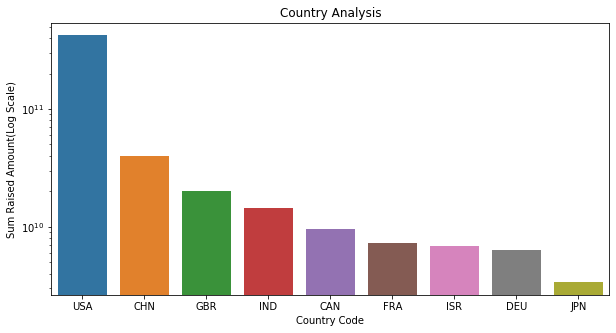

,sum_raised_amt_usd,country_code
country_code,,
USA,422510842796.00,USA
CHN,39835418773.00,CHN
GBR,20245627416.00,GBR
IND,14391858718.00,IND
CAN,9583332317.00,CAN


In [20]:
plt.figure(figsize=(10,5))

# bar plot 
top9.head(9)
top9['country_code'] = top9.index
g=sns.barplot(x='country_code', y='sum_raised_amt_usd', data=top9.head(9))
g.set_yscale('log')
g.set(xlabel='Country Code',ylabel='Sum Raised Amount(Log Scale)')
plt.title("Country Analysis")
plt.show()
top9.head()

In [21]:
#Merging the 3 Country wise count,sector dataframes for Plotting
mrg_ctry1_ctry2_ctry3=pd.concat([Country1_df_cnt, Country2_df_cnt,Country3_df_cnt,], axis = 0)
mrg_ctry1_ctry2_ctry3['main_sector'] = mrg_ctry1_ctry2_ctry3.index
mrg_ctry1_ctry2_ctry3.head(9)

,Count,Country,main_sector
main_sector,,,
Others,2400,USA,Others
Cleantech / Semiconductors,1950,USA,Cleantech / Semiconductors
"Social, Finance, Analytics, Advertising",1550,USA,"Social, Finance, Analytics, Advertising"
Others,126,GBR,Others
Cleantech / Semiconductors,123,GBR,Cleantech / Semiconductors
"Social, Finance, Analytics, Advertising",89,GBR,"Social, Finance, Analytics, Advertising"
Others,77,IND,Others
"News, Search and Messaging",41,IND,"News, Search and Messaging"
"Social, Finance, Analytics, Advertising",25,IND,"Social, Finance, Analytics, Advertising"


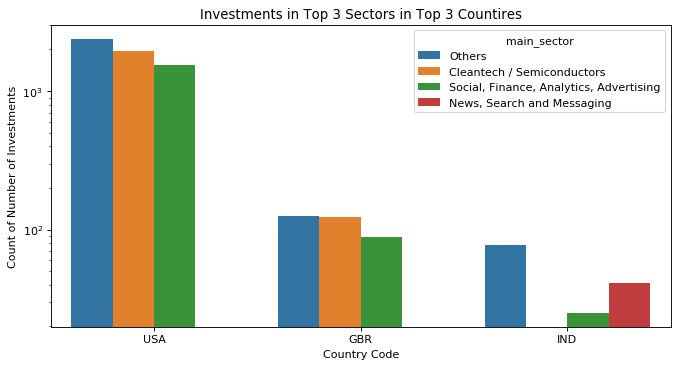

In [22]:
# set figure size for larger figure
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

h=sns.barplot(x='Country', y='Count',hue='main_sector', data=mrg_ctry1_ctry2_ctry3)
h.set_yscale('log')
h.set(xlabel='Country Code',ylabel='Count of Number of Investments')
plt.title("Investments in Top 3 Sectors in Top 3 Countires")
plt.show()